In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


## FLight price Prediction

1.Identifying the target and independent features
2. Cleaning the data set
3. Feature Engineering
4.Feature Encoding and Scaling
5.Feature selection
6.Check distribution of target variable
7.Get insights from graphs for fine-tuning features
8.Model application and hyper-parameter tuning
9.Combining different models

In [2]:
df_train=pd.read_excel("C:\\python\\ML\\Flight_Price\\Data_Train.xlsx")
df_to_predict = pd.read_excel("C:\\python\\ML\\Flight_Price\\Test_set.xlsx")

In [3]:
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
df_train.shape

(10683, 11)

In [5]:
df_train.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [6]:
df_train.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [7]:
# TO check the missing value
df_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [8]:
# Since we have only one null value in our dataset I am simply removing it, as making efforts to 
#impute a single value does not seem like a good option.
df_train.dropna(inplace=True)


In [9]:
# TO check duplicate rows in dataset
# Select duplicate rows except first occurrence based on all columns
duplicaterowDF= df_train[df_train.duplicated()]
print("Total duplicated Row except first occurrence based on all columns")
duplicaterowDF.shape

Total duplicated Row except first occurrence based on all columns


(220, 11)

In [10]:
#remove duplicate rows in training dataset, except first occurenece
df_train.drop_duplicates(keep='first',inplace=True)

In [11]:
#In the drop_duplicates command above, keep='first' option allows us to keep the first occurrence of the
#row values while removing all the subsequent occurrences

In [12]:
df_to_predict.shape


(2671, 10)

In [13]:
 # Data Cleaning
    
print("Trian set\n",df_train["Additional_Info"].value_counts())
print("Test set\n",df_to_predict["Additional_Info"].value_counts())   

Trian set
 No info                         8182
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
2 Long layover                     1
Red-eye flight                     1
Name: Additional_Info, dtype: int64
Test set
 No info                         2148
In-flight meal not included      444
No check-in baggage included      76
1 Long layover                     1
Change airports                    1
Business class                     1
Name: Additional_Info, dtype: int64


In [14]:
df_to_predict.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [15]:
df_to_predict['Additional_Info'].value_counts()

No info                         2148
In-flight meal not included      444
No check-in baggage included      76
1 Long layover                     1
Change airports                    1
Business class                     1
Name: Additional_Info, dtype: int64

In [16]:
df_to_predict['Destination'].value_counts()

Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64

In [17]:

# Assign values manually to Total_stops column since label encoder might assign 
# wrong values. Like it can assign value 1 to 'non-stop' or 2 to '3 stops'
df_train.Total_Stops.replace(['1 stop','2 stops','non-stop','3 stops','4 stops'],[1,2,0,3,4],inplace=True)
df_to_predict.Total_Stops.replace(['1 stop','2 stops','non-stop','3 stops','4 stops'],[1,2,0,3,4],inplace=True)

df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302


In [18]:
df_train['Total_Stops']=df_train['Total_Stops'].astype(int)
df_to_predict['Total_Stops']=df_train['Total_Stops'].astype(int)
df_train['Total_Stops'].dtypes

dtype('int32')

In [19]:
# Feature Engineering

In [20]:
# feature engineering on Date_of_Journey column
# Extract day and month of journey from the above column in train , test dataset
df_train['is_weekend']=(pd.to_datetime(df_train['Date_of_Journey'],format='%d/%m/%Y').dt.dayofweek)
# to check weekend or not
df_train['is_weekend']=(df_train['is_weekend']//5==1).astype(int)
df_train['dayname_of_week']=pd.to_datetime(df_train['Date_of_Journey'],format='%d/%m/%Y').dt.weekday_name
df_train['day_of_Journey']=(pd.to_datetime(df_train['Date_of_Journey'],format='%d/%m/%Y').dt.day)
df_train['Month_of_Journey']=(pd.to_datetime(df_train['Date_of_Journey'],format='%d/%m/%Y').dt.month)
df_train.drop(['Date_of_Journey'],axis=1,inplace=True)

# TEst dataset
df_to_predict['is_weekend']=(pd.to_datetime(df_to_predict['Date_of_Journey'],format='%d/%m/%Y').dt.dayofweek)
# to check weekend or not
df_to_predict['is_weekend']=(df_to_predict['is_weekend']//5==1).astype(int)
df_to_predict['dayname_of_week']=pd.to_datetime(df_to_predict['Date_of_Journey'],format='%d/%m/%Y').dt.weekday_name
df_to_predict['day_of_Journey']=(pd.to_datetime(df_to_predict['Date_of_Journey'],format='%d/%m/%Y').dt.day)
df_to_predict['Month_of_Journey']=(pd.to_datetime(df_to_predict['Date_of_Journey'],format='%d/%m/%Y').dt.month)
df_to_predict.drop(['Date_of_Journey'],axis=1,inplace=True)

In [21]:
df_train.head(30)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,is_weekend,dayname_of_week,day_of_Journey,Month_of_Journey
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897,1,Sunday,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662,0,Wednesday,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882,1,Sunday,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218,1,Sunday,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302,0,Friday,1,3
5,SpiceJet,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,0,No info,3873,0,Monday,24,6
6,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1,In-flight meal not included,11087,0,Tuesday,12,3
7,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1,No info,22270,0,Friday,1,3
8,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1,In-flight meal not included,11087,0,Tuesday,12,3
9,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1,No info,8625,0,Monday,27,5


In [22]:
 
# cleaning duration column in dataset to predict
duration = list(df_train["Duration"])
duration

['2h 50m',
 '7h 25m',
 '19h',
 '5h 25m',
 '4h 45m',
 '2h 25m',
 '15h 30m',
 '21h 5m',
 '25h 30m',
 '7h 50m',
 '13h 15m',
 '2h 35m',
 '2h 15m',
 '12h 10m',
 '2h 35m',
 '26h 35m',
 '4h 30m',
 '22h 35m',
 '23h',
 '20h 35m',
 '5h 10m',
 '15h 20m',
 '2h 50m',
 '2h 55m',
 '13h 20m',
 '15h 10m',
 '5h 45m',
 '5h 55m',
 '2h 50m',
 '2h 15m',
 '2h 15m',
 '13h 25m',
 '2h 50m',
 '22h',
 '5h 30m',
 '10h 25m',
 '5h 15m',
 '2h 30m',
 '6h 15m',
 '11h 55m',
 '11h 5m',
 '8h 30m',
 '22h 5m',
 '2h 45m',
 '12h',
 '2h 50m',
 '2h 50m',
 '2h 15m',
 '16h 5m',
 '19h 55m',
 '3h 15m',
 '25h 20m',
 '2h 50m',
 '3h',
 '2h 50m',
 '16h 15m',
 '15h 5m',
 '2h 15m',
 '6h 30m',
 '25h 5m',
 '12h 25m',
 '27h 20m',
 '10h 15m',
 '10h 30m',
 '2h 15m',
 '10h 25m',
 '2h 50m',
 '1h 30m',
 '13h 20m',
 '2h 15m',
 '1h 25m',
 '26h 30m',
 '7h 20m',
 '13h 30m',
 '5h',
 '2h 45m',
 '2h 50m',
 '1h 30m',
 '19h 5m',
 '2h 15m',
 '14h 50m',
 '2h 40m',
 '22h 10m',
 '9h 35m',
 '10h',
 '21h 20m',
 '5h 25m',
 '18h 45m',
 '12h 20m',
 '18h',
 '9h 15

In [23]:
d1=duration[1].split()
d1

['7h', '25m']

In [24]:
len(d1)

duration[1].strip()  # strip function will remove whitespace between numbers

'7h 25m'

In [25]:
# training set, to convert hours into minute
for i in range(len(duration)) :
    if len(duration[i].split()) != 2:
        if 'h' in duration[i] :
            duration[i] = duration[i].strip() + ' 0m'
        elif 'm' in duration[i] :
            duration[i] = '0h {}'.format(duration[i].strip())
            dur_hours = []
dur_minutes = []  
dur_seconds = []
for i in range(len(duration)) :
    dur_minutes.append(int(duration[i].split()[0][:-1])*60 + int(duration[i].split()[1][:-1]))
    #dur_seconds.append(int(duration[i].split()[0][:-1])*60*60 + int(duration[i].split()[1][:-1])*60)

df_train["Duration_minutes"] = dur_minutes
df_train["Duration_seconds"]= df_train["Duration_minutes"]*60
df_train.drop(['Duration'],axis=1,inplace=True)


In [26]:

# cleaning duration column in dataset to predict
duration = list(df_to_predict["Duration"])

for i in range(len(duration)) :
    if len(duration[i].split()) != 2:
        if 'h' in duration[i] :
            duration[i] = duration[i].strip() + ' 0m'
        elif 'm' in duration[i] :
            duration[i] = '0h {}'.format(duration[i].strip())
            dur_hours = []
dur_minutes = []  
dur_seconds = []
for i in range(len(duration)) :
    dur_minutes.append(int(duration[i].split()[0][:-1])*60 + int(duration[i].split()[1][:-1]))
    #dur_seconds.append(int(duration[i].split()[0][:-1])*60*60 + int(duration[i].split()[1][:-1])*60)

df_to_predict["Duration_minutes"] = dur_minutes
df_to_predict["Duration_seconds"]= df_to_predict["Duration_minutes"]*60
df_to_predict.drop(['Duration'],axis=1,inplace=True)



In [27]:
# Cleaning departure & arrival time
df_train["dep_time_Hour"]=pd.to_datetime(df_train['Dep_Time']).dt.hour
df_train["dep_time_Min"]=pd.to_datetime(df_train['Dep_Time']).dt.minute
df_train.drop(['Dep_Time'],axis=1,inplace=True)

df_train["Arr_time_Hour"]=pd.to_datetime(df_train['Arrival_Time']).dt.hour
df_train["Arr_time_Min"]=pd.to_datetime(df_train['Arrival_Time']).dt.minute
df_train.drop(['Arrival_Time'],axis=1,inplace=True)



In [28]:
df_train.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,is_weekend,dayname_of_week,day_of_Journey,Month_of_Journey,Duration_minutes,Duration_seconds,dep_time_Hour,dep_time_Min,Arr_time_Hour,Arr_time_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,No info,3897,1,Sunday,24,3,170,10200,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,No info,7662,0,Wednesday,1,5,445,26700,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,No info,13882,1,Sunday,9,6,1140,68400,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1,No info,6218,1,Sunday,12,5,325,19500,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1,No info,13302,0,Friday,1,3,285,17100,16,50,21,35


In [29]:
# Cleaning departure & arrival time for predictin time
df_to_predict["dep_time_Hour"]=pd.to_datetime(df_to_predict['Dep_Time']).dt.hour
df_to_predict["dep_time_Min"]=pd.to_datetime(df_to_predict['Dep_Time']).dt.minute
df_to_predict.drop(['Dep_Time'],axis=1,inplace=True)

df_to_predict["Arr_time_Hour"]=pd.to_datetime(df_to_predict['Arrival_Time']).dt.hour
df_to_predict["Arr_time_Min"]=pd.to_datetime(df_to_predict['Arrival_Time']).dt.minute
df_to_predict.drop(['Arrival_Time'],axis=1,inplace=True)

In [30]:
# TO define dependent & independent variable
X=df_train.drop(['Price'],axis=1)
y=np.log1p(df_train["Price"])
X.columns
X_to_predict=df_to_predict

In [31]:

#Separate categorical and numerical columns in dataframe
X_categorical = X.select_dtypes(exclude=['int64','int', 'float'])
X_numerical = X.select_dtypes(include=['int','int64', 'float'])

X_to_predict_categorical = X_to_predict.select_dtypes(exclude=['int64','int', 'float64'])
X_to_predict_numerical = X_to_predict.select_dtypes(include=['int', 'int64','float'])

In [32]:
X.dtypes


Airline             object
Source              object
Destination         object
Route               object
Total_Stops          int32
Additional_Info     object
is_weekend           int32
dayname_of_week     object
day_of_Journey       int64
Month_of_Journey     int64
Duration_minutes     int64
Duration_seconds     int64
dep_time_Hour        int64
dep_time_Min         int64
Arr_time_Hour        int64
Arr_time_Min         int64
dtype: object

In [33]:
X_categorical.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Additional_Info',
       'dayname_of_week'],
      dtype='object')

In [34]:
X_to_predict_categorical.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Additional_Info',
       'dayname_of_week'],
      dtype='object')

In [35]:
X_numerical.head()

,Total_Stops,is_weekend,day_of_Journey,Month_of_Journey,Duration_minutes,Duration_seconds,dep_time_Hour,dep_time_Min,Arr_time_Hour,Arr_time_Min
0,0,1,24,3,170,10200,22,20,1,10
1,2,0,1,5,445,26700,5,50,13,15
2,2,1,9,6,1140,68400,9,25,4,25
3,1,1,12,5,325,19500,18,5,23,30
4,1,0,1,3,285,17100,16,50,21,35


In [36]:
#Create a back up copy specifically for plotting graphs
X_numerical_graph = X_numerical.copy()
X_categorical_graph = X_categorical.copy()

In [37]:

#We replace values based on insights gathered from graphs generated in further steps
X_categorical["Airline"].replace(to_replace={'Multiple carriers Premium economy':'Other', 
                                                        'Jet Airways Business':'Other',
                                                        'Vistara Premium economy':'Other',
                                                        'Trujet':'Other'
                                                   },    
                                        inplace=True)

X_to_predict_categorical["Airline"].replace(to_replace={'Multiple carriers Premium economy':'Other', 
                                                        'Jet Airways Business':'Other',
                                                        'Vistara Premium economy':'Other',
                                                        'Trujet':'Other'
                                                   },    
                                        inplace=True)

C:\Users\inshn\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:4619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [38]:

#We replace values based on insights gathered from graphs generated in further steps
X_categorical["Additional_Info"].replace(['Change airports' ,
                                                        'Business class',
                                                        '1 Short layover',
                                                        'Red-eye flight',
                                                        '2 Long layover' ] ,['other','other','other','other','other']
                                                   ,    
                                        inplace=True)
X_to_predict_categorical["Additional_Info"].replace(to_replace={'Change airports':'Other', 
                                                        'Business class':'Other',
                                                        '1 Short layover':'Other',
                                                        'Red-eye flight':'Other',
                                                        '2 Long layover':'Other',   
                                                   },    
                                        inplace=True)

C:\Users\inshn\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:4619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [39]:
X_categorical["Additional_Info"].value_counts()

No info                         8182
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
other                             14
No Info                            3
Name: Additional_Info, dtype: int64

In [40]:
X_categorical.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Additional_Info',
       'dayname_of_week'],
      dtype='object')

In [41]:
X_to_predict_categorical.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Additional_Info',
       'dayname_of_week'],
      dtype='object')

In [42]:
X_categorical.head()

,Airline,Source,Destination,Route,Additional_Info,dayname_of_week
0,IndiGo,Banglore,New Delhi,BLR → DEL,No info,Sunday
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,No info,Wednesday
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,No info,Sunday
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,No info,Sunday
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,No info,Friday


In [43]:
#Label encode and hot encode categorical columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X_categorical = X_categorical.apply(le.fit_transform)
X_to_predict_categorical = X_to_predict_categorical.apply(le.fit_transform)

In [44]:
X_categorical.head()

,Airline,Source,Destination,Route,Additional_Info,dayname_of_week
0,3,0,5,18,4,3
1,1,3,0,84,4,6
2,4,2,1,118,4,3
3,3,3,0,91,4,3
4,3,0,5,29,4,0


In [45]:
X_to_predict_categorical.head()

,Airline,Source,Destination,Route,Additional_Info,dayname_of_week
0,4,2,1,76,3,4
1,3,3,0,65,3,3
2,4,2,1,76,1,5
3,5,2,1,76,3,5
4,0,0,2,16,3,1


In [46]:
X_numerical.head()
X_numerical.shape


(10462, 10)

In [47]:
X_to_predict_numerical.head()
X_to_predict_numerical.shape

(2671, 10)

In [48]:
# Check the skew of all numerical features
from scipy.stats import skew
skewed_feats = X_numerical.apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))


Skew in numerical features: 

There are 10 skewed numerical features to Box Cox transform


In [49]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
cols_train = list(X_numerical.columns)
index_train = X_numerical.index.tolist()
cols_test = list(X_to_predict_numerical.columns)
index_test = X_to_predict_numerical.index.tolist()

In [50]:
# We can also use standard scaler if required...The code is commented for now
# Get column names first
X_numerical_names = X_numerical.columns
X_numerical_index = X_numerical.index
X_to_predict_numerical_names = X_to_predict_numerical.columns

In [51]:
from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.5
for feat in skewed_features:
    #all_data[feat] += 1
    X_numerical[feat] = boxcox1p(X_numerical[feat], lam)
    X_to_predict_numerical[feat] = boxcox1p(X_to_predict_numerical[feat], lam)

C:\Users\inshn\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\inshn\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [52]:
#Check values in numerical columns after minmax scaling
X_numerical.head(5)

,Total_Stops,is_weekend,day_of_Journey,Month_of_Journey,Duration_minutes,Duration_seconds,dep_time_Hour,dep_time_Min,Arr_time_Hour,Arr_time_Min
0,0.000000,0.828427,8.000000,2.000000,24.153394,200.000000,7.591663,7.165151,0.828427,4.633250
1,1.464102,0.000000,0.828427,2.898979,40.237424,324.808813,2.898979,12.282857,5.483315,6.000000
2,1.464102,0.828427,4.324555,3.291503,65.557383,521.071697,4.324555,8.198039,2.472136,8.198039
3,0.828427,0.828427,5.211103,2.898979,34.110940,277.291962,6.717798,2.898979,7.797959,9.135529
4,0.828427,0.000000,0.828427,2.000000,31.823069,259.541584,6.246211,12.282857,7.380832,10.000000


In [53]:
#Merge categorical and numerical columns back into respective X and X_to_predict
X= pd.concat([X_numerical,X_categorical],axis=1)
X_to_predict= pd.concat([X_to_predict_numerical,X_to_predict_categorical],axis=1)

In [54]:
X.head()

,Total_Stops,is_weekend,day_of_Journey,Month_of_Journey,Duration_minutes,Duration_seconds,dep_time_Hour,dep_time_Min,Arr_time_Hour,Arr_time_Min,Airline,Source,Destination,Route,Additional_Info,dayname_of_week
0,0.000000,0.828427,8.000000,2.000000,24.153394,200.000000,7.591663,7.165151,0.828427,4.633250,3,0,5,18,4,3
1,1.464102,0.000000,0.828427,2.898979,40.237424,324.808813,2.898979,12.282857,5.483315,6.000000,1,3,0,84,4,6
2,1.464102,0.828427,4.324555,3.291503,65.557383,521.071697,4.324555,8.198039,2.472136,8.198039,4,2,1,118,4,3
3,0.828427,0.828427,5.211103,2.898979,34.110940,277.291962,6.717798,2.898979,7.797959,9.135529,3,3,0,91,4,3
4,0.828427,0.000000,0.828427,2.000000,31.823069,259.541584,6.246211,12.282857,7.380832,10.000000,3,0,5,29,4,0


In [55]:
#Check shape of all three to verify that merge was done properly in above step
print(X.shape, X_numerical.shape, X_categorical.shape)
print(X_to_predict.shape, X_to_predict_numerical.shape, X_to_predict_categorical.shape)
print(y.shape)

(10462, 16) (10462, 10) (10462, 6)
(2671, 16) (2671, 10) (2671, 6)
(10462,)


## Print accuracy metrics

In [56]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_log_error
# We have created a function to print accuracy metrics which can be used
# to get accuracy metrics of all models in upcoming steps
def print_accuracy_report(y_test, y_pred,X_test, model):
 print('R Squared(Accuracy)', metrics.r2_score(y_test, y_pred))   
 print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
 print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
 print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
 print('Root Mean Squared Log Error',np.sqrt(mean_squared_log_error( y_test, y_pred )))


## we have created a function to generate linear regression model
# which can then be called again after feature selection or other steps

In [57]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
def LinearRegressionModel(X,y):
 X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42, test_size=0.3)
 regressor = LinearRegression()  
 regressor.fit(X_train, y_train)
 y_pred = regressor.predict(X_test)
 print(print_accuracy_report(y_test, y_pred, X_test, regressor))
 return regressor

In [58]:

linearModel = LinearRegressionModel(X,y)

R Squared(Accuracy) 0.6257756982489532
Mean Absolute Error: 0.25399721786795876
Mean Squared Error: 0.09861484901869362
Root Mean Squared Error: 0.3140300129266208
Root Mean Squared Log Error 0.031541707158304295
None


In [59]:
# we have created a function to generate linear regression model
# which can then be called again after feature selection or other steps
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import accuracy_score
def BayesianRidgeModel(X,y):
 X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42, test_size=0.3)
 regressor = BayesianRidge()  
 regressor.fit(X_train, y_train)
 y_pred = regressor.predict(X_test)
 print(print_accuracy_report(y_test, y_pred, X_test, regressor))
 return regressor
linearModel = BayesianRidgeModel(X,y)

R Squared(Accuracy) 0.625145396067998
Mean Absolute Error: 0.2542347747467612
Mean Squared Error: 0.09878094500476453
Root Mean Squared Error: 0.314294360440598
Root Mean Squared Log Error 0.031568157329024814
None


In [60]:
#similarly define a function for random forest regressor
from sklearn.ensemble import RandomForestRegressor
def RandomForestRegressorModel(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42, test_size=0.3)
    rf = RandomForestRegressor(random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    print(print_accuracy_report(y_test, y_pred, X_test, rf))
    return rf
randomForestModel = RandomForestRegressorModel(X,y)

R Squared(Accuracy) 0.9245264462828292
Mean Absolute Error: 0.0771508215256869
Mean Squared Error: 0.019888641838322934
Root Mean Squared Error: 0.1410270961139133
Root Mean Squared Log Error 0.01408673093740681
None


## get feature importances from a model2

In [61]:


import matplotlib.pyplot as plt
def plotFeatureImportances(model):
    #first print all features importances in descending order
    feature_importances = pd.DataFrame(model.feature_importances_,
                                   index = X.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
    print(feature_importances)
    # Next plot feature importances to get idea about where the curve breaks
    # in the graph i.e. select top appropriate features
    features = X.columns.tolist()
    importances = model.feature_importances_
    indices = np.argsort(importances)
    plt.title('Feature Importances')
    plt.barh(range(len(indices)), importances[indices], color='b', align='center')
    plt.yticks(range(len(indices)), [features[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.show()

                  importance
Duration_minutes    0.351931
Duration_seconds    0.253468
Airline             0.094730
day_of_Journey      0.048720
Additional_Info     0.046884
Total_Stops         0.040614
Month_of_Journey    0.037043
Route               0.022334
dep_time_Min        0.016768
Destination         0.016676
dayname_of_week     0.016266
Arr_time_Hour       0.015884
dep_time_Hour       0.014273
Arr_time_Min        0.013334
is_weekend          0.005733
Source              0.005342


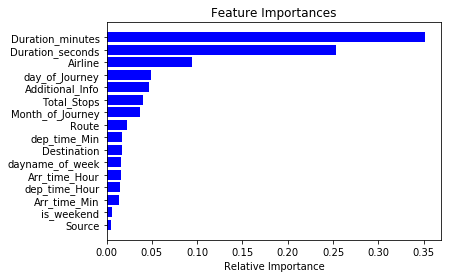

In [62]:
plotFeatureImportances(randomForestModel)

In [63]:
# select features using extratreesclassifier
from sklearn.ensemble import ExtraTreesRegressor
def ExtraTreesRegressorModel(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42, test_size=0.3)
    rf = ExtraTreesRegressor()
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    print(print_accuracy_report(y_test, y_pred, X_test, rf))
    return rf
extraTreeRegressorModel = ExtraTreesRegressorModel(X,y)

R Squared(Accuracy) 0.9313097750950294
Mean Absolute Error: 0.07204976797480589
Mean Squared Error: 0.018101112424735326
Root Mean Squared Error: 0.13454037470118524
Root Mean Squared Log Error 0.013414983995314492
None


                  importance
Total_Stops         0.281243
Duration_seconds    0.185776
Airline             0.115452
Duration_minutes    0.101013
Month_of_Journey    0.053460
day_of_Journey      0.053076
Route               0.041327
Additional_Info     0.036187
Destination         0.030290
Arr_time_Hour       0.018487
Source              0.016246
dep_time_Hour       0.016015
dep_time_Min        0.015051
Arr_time_Min        0.013759
dayname_of_week     0.012888
is_weekend          0.009730


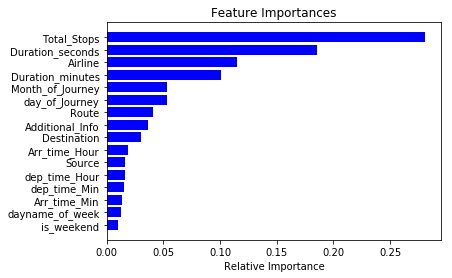

In [64]:
plotFeatureImportances(extraTreeRegressorModel)

In [65]:
# select features using XGboost
from xgboost import XGBRegressor
def XGBRegressorModel(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42, test_size=0.3)
    rf = XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =42, nthread = -1)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    print(print_accuracy_report(y_test, y_pred, X_test, rf))
    return rf
xgbRegressorModel = XGBRegressorModel(X,y)

R Squared(Accuracy) 0.9208639705719383
Mean Absolute Error: 0.10215119802215096
Mean Squared Error: 0.020853770205385574
Root Mean Squared Error: 0.14440834534536282
Root Mean Squared Log Error 0.014457309425048713
None


                  importance
Total_Stops         0.294841
Duration_seconds    0.149858
Duration_minutes    0.133718
Airline             0.078327
Source              0.061371
Additional_Info     0.054662
Destination         0.050032
day_of_Journey      0.041423
Month_of_Journey    0.032735
Route               0.023341
dayname_of_week     0.021112
is_weekend          0.015541
Arr_time_Hour       0.012029
dep_time_Hour       0.011319
Arr_time_Min        0.010473
dep_time_Min        0.009218


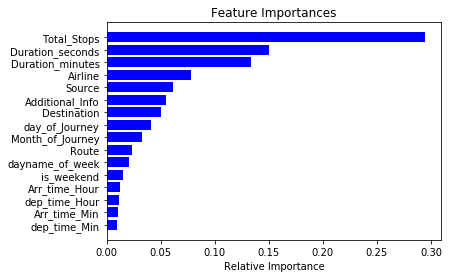

In [66]:
plotFeatureImportances(xgbRegressorModel)

## # select features using XGboost, unsing RandomizedSearchCV, Grid CV

In [67]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
params = {
  'reg_alpha':[1e-5]
}
def XGBoostRegressorModel1(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42, test_size=0.3)
    rf=XGBRegressor(learning_rate =0.1, n_estimators=240,
     subsample=0.8, colsample_bytree=0.8,
     scale_pos_weight=1, seed=42, max_depth= 10, min_child_weight=5,gamma=0.0, reg_alpha=1e-5)
    rf_random = GridSearchCV(estimator = rf, param_grid = params, cv = 3, verbose=2, n_jobs = 8)
    rf_random.fit(X_train, y_train)
    print(rf_random.best_params_)
    y_pred = rf_random.best_estimator_.predict(X_test)
    print(print_accuracy_report(y_test, y_pred, X_test, rf_random.best_estimator_))
    return rf_random.best_estimator_
xgBoostModel1 = XGBoostRegressorModel1(X,y)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=8)]: Done   3 out of   3 | elapsed:   15.5s finished


[10:00:14] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
{'reg_alpha': 1e-05}
R Squared(Accuracy) 0.9434555938321192
Mean Absolute Error: 0.07227447360447059
Mean Squared Error: 0.014900470255421234
Root Mean Squared Error: 0.12206748238339822
Root Mean Squared Log Error 0.012186402927517688
None


                  importance
Total_Stops         0.298466
Duration_seconds    0.203562
Duration_minutes    0.164399
Airline             0.069046
Additional_Info     0.058969
Destination         0.048480
Month_of_Journey    0.030302
Route               0.026929
day_of_Journey      0.022789
Source              0.018352
Arr_time_Hour       0.012367
dayname_of_week     0.011241
dep_time_Hour       0.011116
dep_time_Min        0.009331
Arr_time_Min        0.008366
is_weekend          0.006286


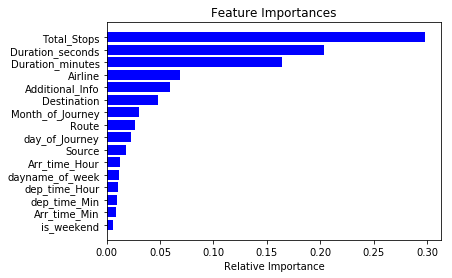

In [68]:
#get feature importances from xgbRegressormodel
plotFeatureImportances(xgBoostModel1)

In [69]:
# select features using GradientBoostingRegressor

from sklearn.ensemble import GradientBoostingRegressor 
def GradientBoostingRegressorModel(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42, test_size=0.3)
    rf = GradientBoostingRegressor()
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    print(print_accuracy_report(y_test, y_pred, X_test, rf))
    return rf
gradientBoostingRegressorModel = XGBRegressorModel(X,y)

R Squared(Accuracy) 0.9208639705719383
Mean Absolute Error: 0.10215119802215096
Mean Squared Error: 0.020853770205385574
Root Mean Squared Error: 0.14440834534536282
Root Mean Squared Log Error 0.014457309425048713
None


## # We can either select features manually from the graphs generated above or
# we can use SelectFromModel module from SKlearn to select most appropriate features automatically. 
# Select_model , to select feature automatically

In [70]:
import numpy as np
from sklearn.feature_selection import SelectFromModel
def SelectFeaturesFromModel (model,X):
    sel = SelectFromModel(model, prefit = True)
    selected_feat= X.columns[(sel.get_support())]
    print("Total features selected: ", len(selected_feat))
    print("Names of selected Features:\n", selected_feat)
    print("\n")

In [71]:
print("Top selected from random forest regressor:")
SelectFeaturesFromModel(randomForestModel,X)

print("Top selected from extra trees regressor:")
SelectFeaturesFromModel(extraTreeRegressorModel,X)

print("Top selected from xgboost regressor:")
SelectFeaturesFromModel(xgbRegressorModel,X)

Top selected from random forest regressor:
Total features selected:  3
Names of selected Features:
 Index(['Duration_minutes', 'Duration_seconds', 'Airline'], dtype='object')


Top selected from extra trees regressor:
Total features selected:  4
Names of selected Features:
 Index(['Total_Stops', 'Duration_minutes', 'Duration_seconds', 'Airline'], dtype='object')


Top selected from xgboost regressor:
Total features selected:  4
Names of selected Features:
 Index(['Total_Stops', 'Duration_minutes', 'Duration_seconds', 'Airline'], dtype='object')




In [72]:
print("Top selected from random forest regressor:")
SelectFeaturesFromModel(linearModel,X)


print("Top selected from xgboost regressor:")
SelectFeaturesFromModel(xgBoostModel1,X)

Top selected from random forest regressor:
Total features selected:  2
Names of selected Features:
 Index(['Duration_minutes', 'Duration_seconds'], dtype='object')


Top selected from xgboost regressor:
Total features selected:  4
Names of selected Features:
 Index(['Total_Stops', 'Duration_minutes', 'Duration_seconds', 'Airline'], dtype='object')




In [73]:
from catboost import CatBoostRegressor
import catboost as cb
from sklearn.model_selection import KFold
from paramsearch import paramsearch
from itertools import product,chain
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
# 'iterations':[250,100,500,1000,2000],
#           'learning_rate':[0.03,0.001,0.01,0.1,0.2,0.3], 
#           'l2_leaf_reg':[3,1,5,10,100],
#           'border_count':[32,5,10,20,50,100,200]
params = {'depth':[3,1,2,6,4,5,7,8,9,10],}

def CBRModel(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42, test_size=0.3)
    rf=CatBoostRegressor()
    rf_random = GridSearchCV(estimator = rf, param_grid = params, cv = 3, verbose=2, n_jobs = 8)
    rf_random.fit(X_train, y_train)
    print(rf_random.best_params_)
    y_pred = rf_random.best_estimator_.predict(X_test)
    print(rf_random.best_params_)
    print(print_accuracy_report(y_test, y_pred, X_test, rf_random.best_estimator_))
    return rf_random.best_estimator_
cegbRressorModel = CBRModel(X,y)

ModuleNotFoundError: No module named 'catboost'

## EDA via graph

In [74]:
#descriptive statistics summary
# Check distribution of Target variable

import seaborn as sns
#print(df_train.describe())
print(df_train['Price'].describe())


count    10462.000000
mean      9026.790289
std       4624.849541
min       1759.000000
25%       5224.000000
50%       8266.000000
75%      12344.750000
max      79512.000000
Name: Price, dtype: float64


Skewness: 1.857490
Kurtosis: 13.527896


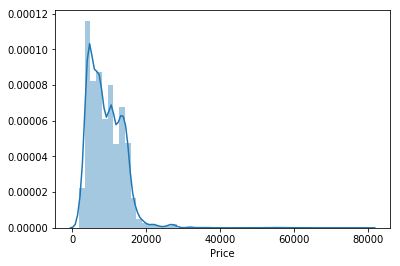

In [75]:
#skewness and kurtosis
print("Skewness: %f"  %df_train['Price'].skew())
print("Kurtosis: %f"  %df_train['Price'].kurt())
sns.distplot(df_train['Price'])

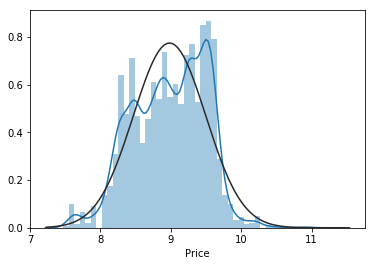

In [76]:
# To get normally distributed curve,it is reqired to take log transform of target variable
from scipy.stats import skew, norm
sns.distplot(np.log1p(df_train['Price']),fit=norm)


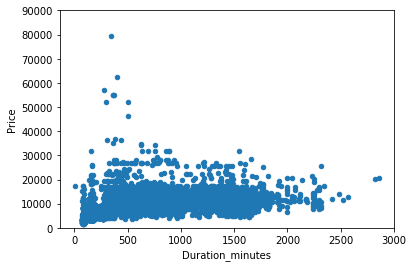

In [77]:
# SCatter plot between duration_minute Vs Price
var = 'Duration_minutes'
data = pd.concat([df_train['Price'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='Price', ylim=(0,90000));

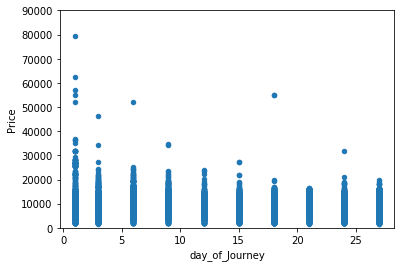

In [78]:
#scatter plot Day_Of_Journey/Price
var1 = 'day_of_Journey'
data1 = pd.concat([df_train['Price'], df_train[var1]], axis=1)
data1.plot.scatter(x=var1, y='Price', ylim=(0,90000));

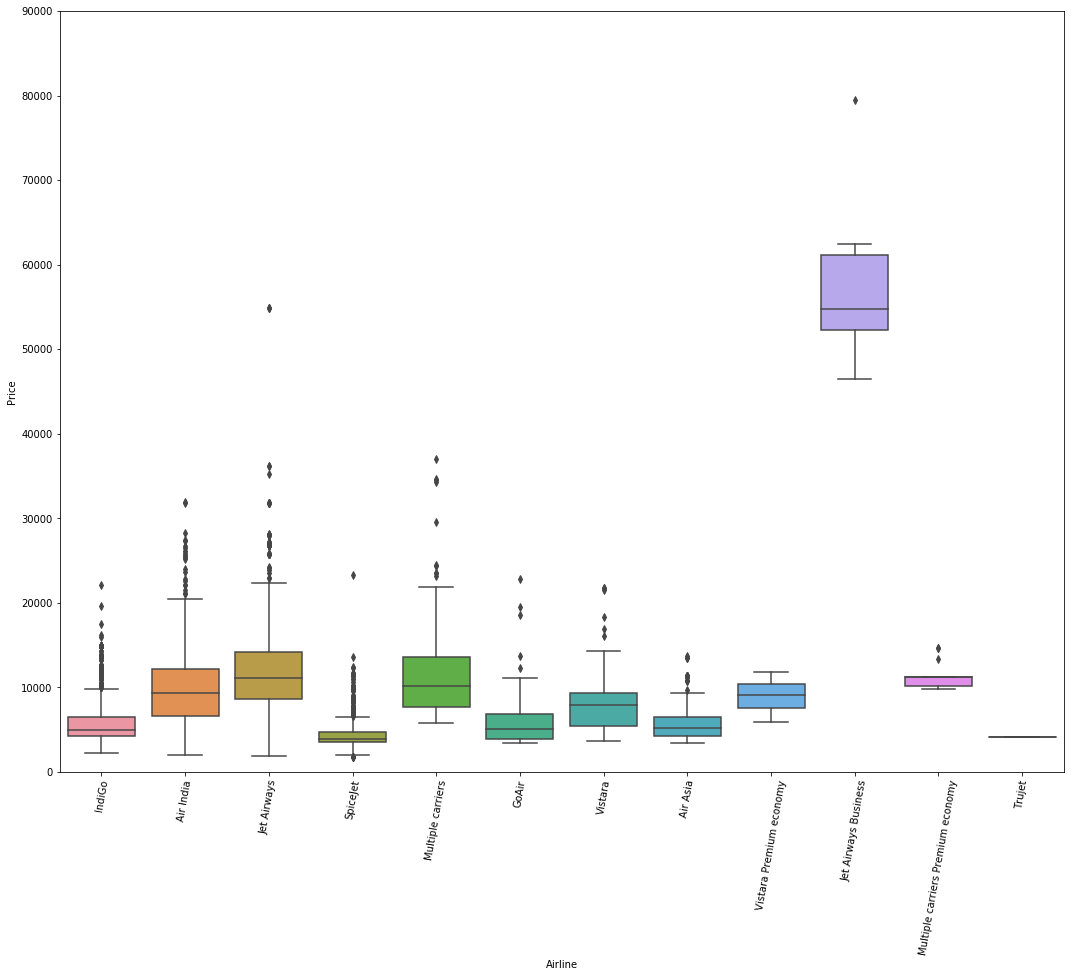

In [79]:
#box plot Airline/Price
var = 'Airline'
data = pd.concat([df_train['Price'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(18, 14))
fig = sns.boxplot(x=var, y="Price", data=data)
plt.xticks(fontsize=10, rotation=80)
fig.axis(ymin=0, ymax=90000);

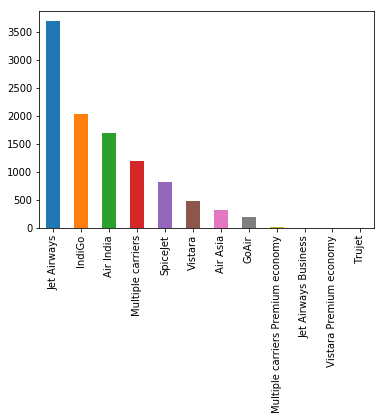

In [80]:
#Frequency distribution of different airlines in above dataset
carrier_count=df_train['Airline'].value_counts()
carrier_count.plot('bar')


## Insights : Jetairways as highest number in above graph, indicates that most travelleres prefer Jet airways
# where last four airway in graph have no values, indicates that no travelleres prefer these airways.
# So The last four flights can be clubbed into single category of "other flights" for improving accuracy of model

In [81]:
#Variation of price against total number of stops:-

Text(0.5,1,'Total_stop Vs Price')

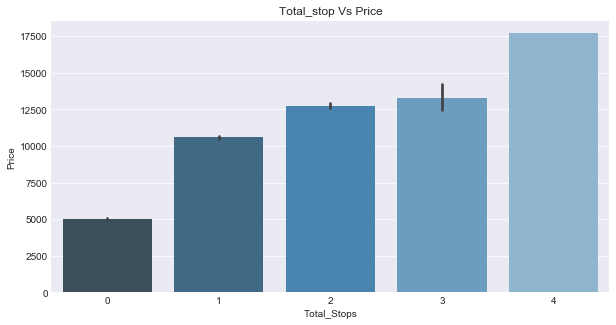

In [82]:
from matplotlib.pyplot import figure
sns.set_style(style="darkgrid")
figure(figsize=(10,5))
sns.barplot(x='Total_Stops',y='Price',data=df_train,palette='Blues_d')
plt.title('Total_stop Vs Price')

## Insight from graph, As no.of Tot_stop increases , price also increases
As expected price of flight tickets is higher for flights with greater number of stops

In [83]:
#Variation of price against Airlines:-

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

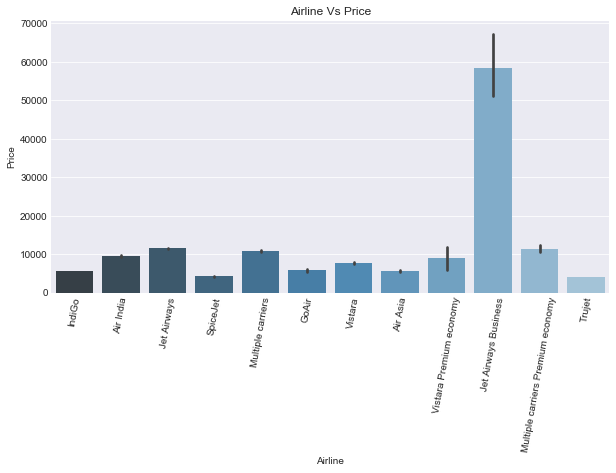

In [84]:
sns.set_style(style="darkgrid")
figure(figsize=(10,5))
sns.barplot(y='Price',x='Airline',data=df_train,palette='Blues_d')
plt.title('Airline Vs Price')
plt.xticks(fontsize=10,rotation=80)

## Insight:- Jet airways business ticket is most expensive

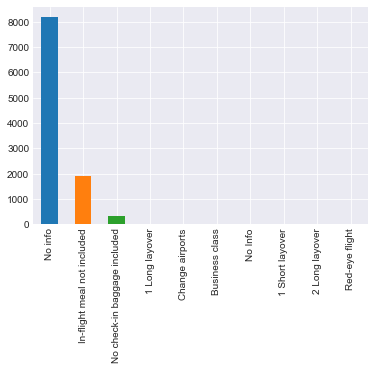

In [85]:
#Frequency distribution of weekday of airline journey

df_train['Additional_Info'].value_counts().plot('bar')

In [86]:
#Insight:-We can combine evening and late eveing into single category for better accuracy

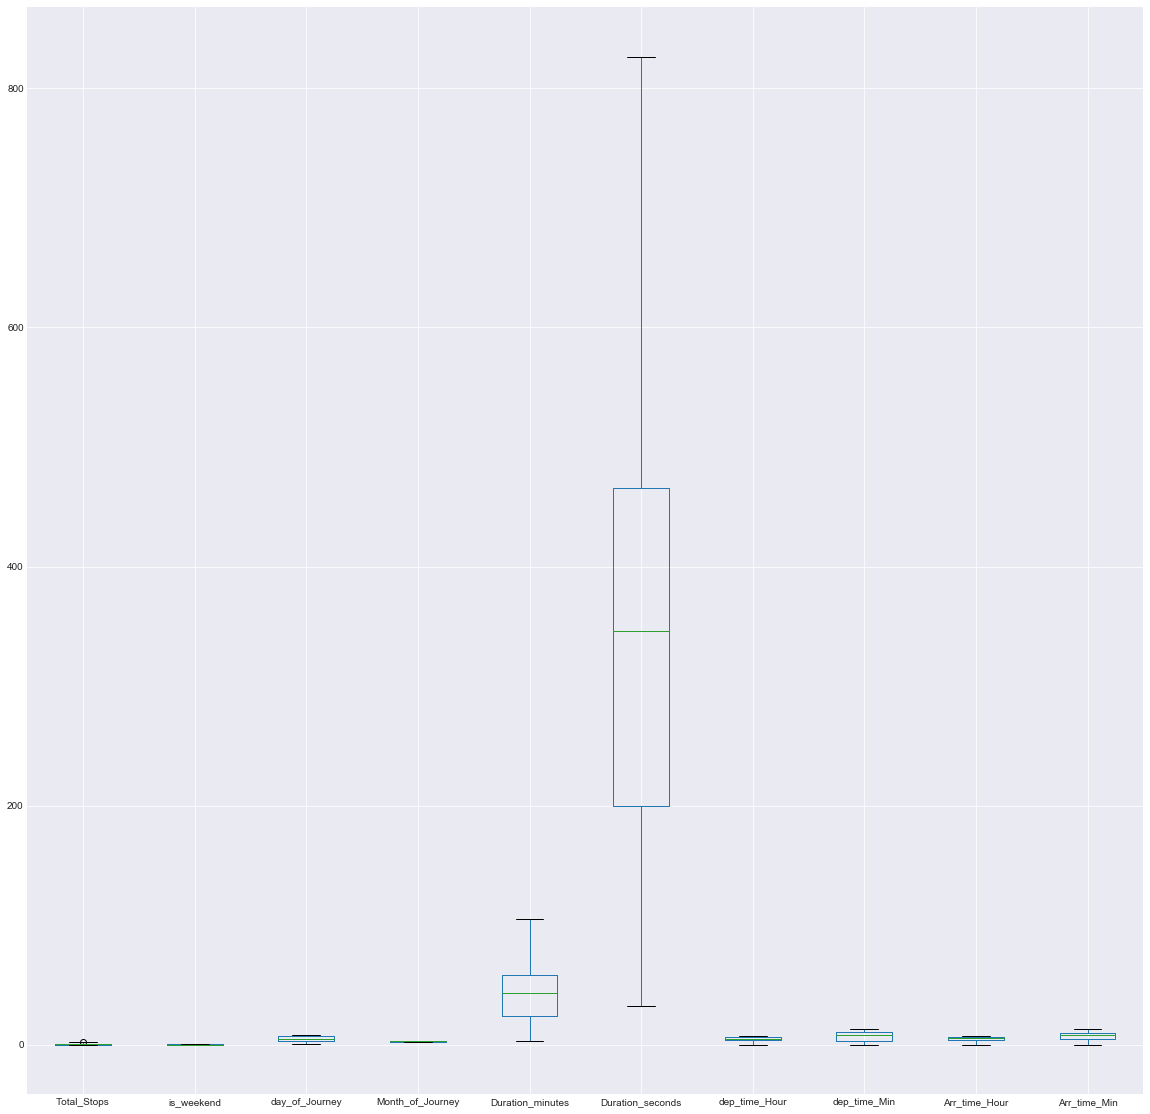

In [87]:
import matplotlib.pyplot as plt
figure(figsize=(20,20)) 
X_numerical.boxplot()


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000FD3CC88>,
      dtype=object)

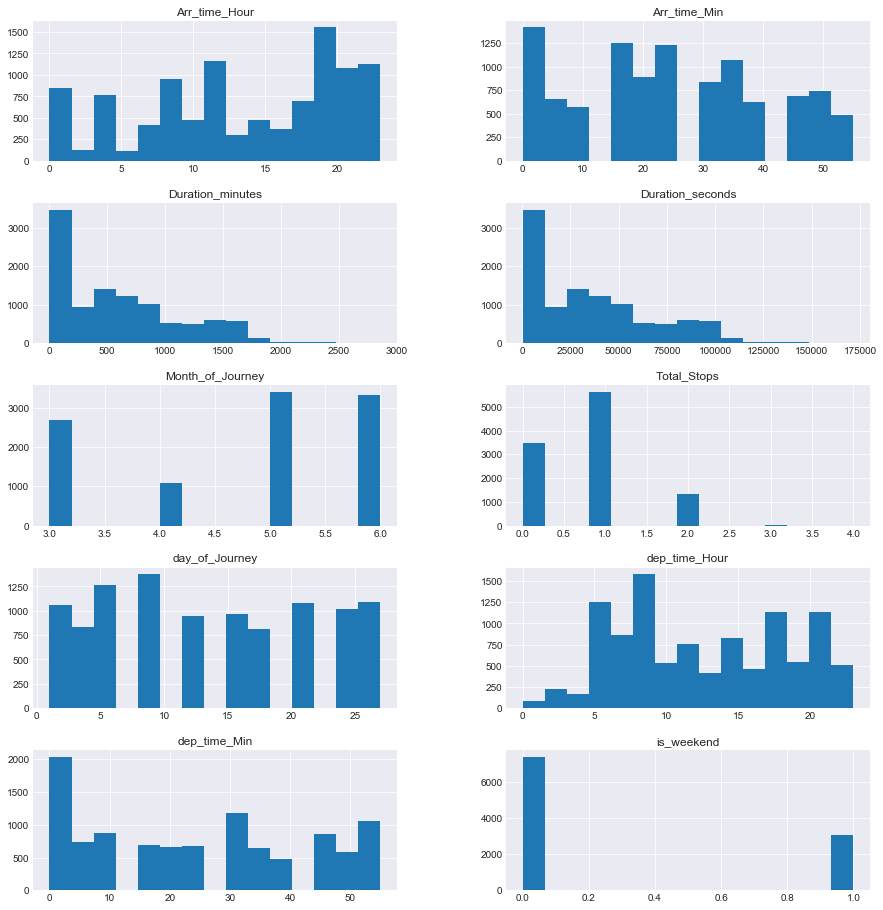

In [88]:
X_numerical_graph.hist(bins=15, figsize=(15, 16), layout=(5, 2))

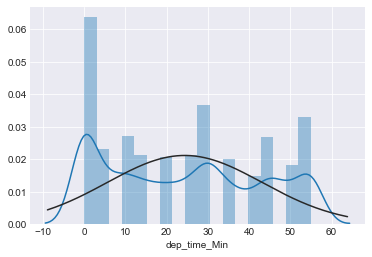

In [89]:
sns.distplot(df_train['dep_time_Min'],fit=norm )

In [90]:
# TO nornmalise  'dep_time_Min' , need to log transform

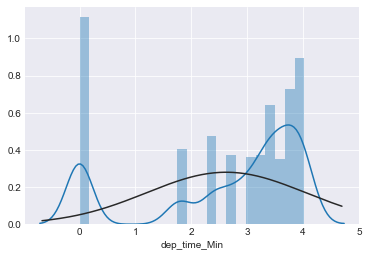

In [91]:
sns.distplot(np.log1p(df_train['dep_time_Min']),fit=norm)

In [92]:
# Countplot in seaborn , used to visulise data in bargraph format

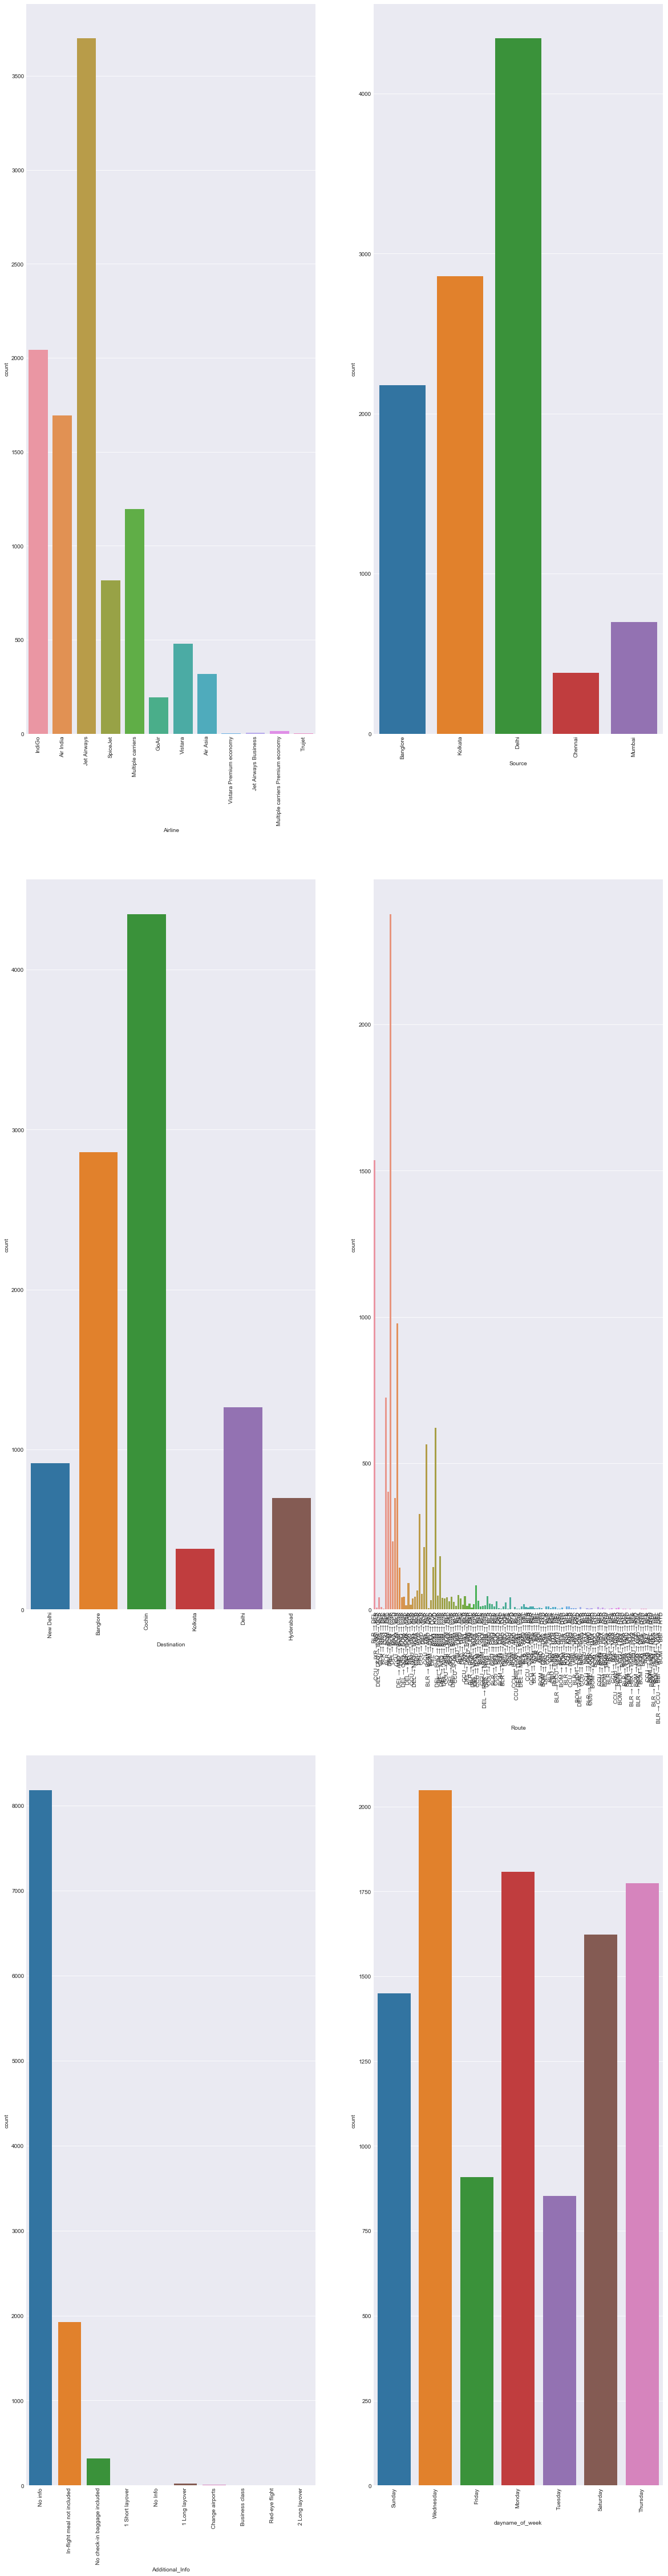

In [93]:
fig, ax = plt.subplots(3, 2, figsize=(20, 80))
columns = X_categorical_graph.columns.tolist()
for variable, subplot in zip(columns,ax.flatten()):
    sns.countplot(X_categorical_graph[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)


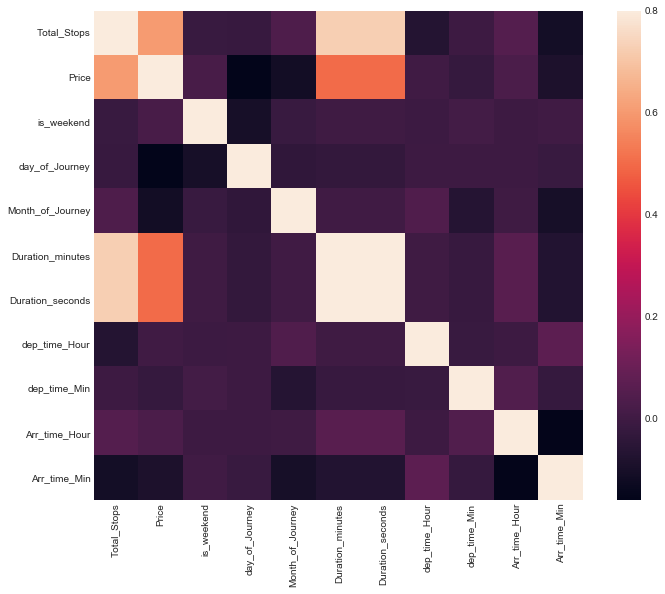

In [94]:

#correlation matrix
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [95]:
X_categorical_graph["Additional_Info"].value_counts()

No info                         8182
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
2 Long layover                     1
Red-eye flight                     1
Name: Additional_Info, dtype: int64

## After improving accuracy using EDA let do hyperparameter tuning to improve model accuracy

#Final Regression Models Optimization using GridSearchCV, RandomizedSearchCV and stacking¶

In [96]:
#GradientBoostingRegressor 

import matplotlib.pylab as plt
import numpy as np 
from sklearn.model_selection import ShuffleSplit, train_test_split 
from sklearn.ensemble import GradientBoostingRegressor 
from sklearn.model_selection import GridSearchCV 
def GridSearchCVGradientBoostingRegressor(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X.values, y.values,random_state=42, test_size=0.3)
    estimator = GradientBoostingRegressor(random_state=42,n_estimators=800,learning_rate=0.05,max_depth=8)
    cv = ShuffleSplit(n_splits=5, random_state=42, test_size=0.3)
    param_grid={ 
                'subsample':[1.0]
               } 
    n_jobs=8
    regressor = GridSearchCV(estimator=estimator, cv=cv, param_grid=param_grid, n_jobs=n_jobs)
    regressor.fit(X_train, y_train)
    y_pred = regressor.best_estimator_.predict(X_test)
    print(regressor.best_params_)
    print(print_accuracy_report(y_test, y_pred, X_test, regressor.best_estimator_))
    return regressor.best_estimator_
gradientBoostingModelCV = GridSearchCVGradientBoostingRegressor(X,y)


{'subsample': 1.0}
R Squared(Accuracy) 0.9410035408022333
Mean Absolute Error: 0.0715840557083664
Mean Squared Error: 0.015546630427800677
Root Mean Squared Error: 0.12468612764778877
Root Mean Squared Log Error 0.012429448647789646
None


In [97]:
# RandomForestRegressor

import matplotlib.pylab as plt
import numpy as np 
from sklearn.decomposition import PCA 
from sklearn.model_selection import ShuffleSplit, train_test_split 
from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import GridSearchCV 
def GridSearchCVRandomForestRegressor(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42, test_size=0.3)
    estimator = RandomForestRegressor()
    cv = ShuffleSplit(n_splits=5, random_state=42, test_size=0.3)
    estimator = RandomForestRegressor()
    # Create the random grid
    param_grid = { 
    'n_estimators': [10, 18, 22, 200, 700],
    'max_features': ['auto', 'sqrt', 'log2']
    }
    n_jobs=4
    regressor = GridSearchCV(estimator=estimator, cv=cv, param_grid=param_grid, n_jobs=n_jobs)
    regressor.fit(X_train, y_train)
    y_pred = regressor.best_estimator_.predict(X_test)
    print(regressor.best_params_)
    print(print_accuracy_report(y_test, y_pred, X_test, regressor.best_estimator_))
    return regressor.best_estimator_
randomForestRegressorModel = GridSearchCVRandomForestRegressor(X,y)

{'max_features': 'auto', 'n_estimators': 700}
R Squared(Accuracy) 0.9332754859379119
Mean Absolute Error: 0.0728171026068695
Mean Squared Error: 0.01758311218509772
Root Mean Squared Error: 0.1326013279914561
Root Mean Squared Log Error 0.013217336045425182
None


In [98]:
# 

import matplotlib.pylab as plt
import numpy as np 
from sklearn.decomposition import PCA 
from sklearn.model_selection import ShuffleSplit, train_test_split 
from sklearn.ensemble import ExtraTreesRegressor 
from sklearn.model_selection import GridSearchCV 
def GridSearchCVExtraTreesRegressor(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42, test_size=0.3)
    estimator = ExtraTreesRegressor()
    cv = ShuffleSplit(n_splits=5, random_state=42, test_size=0.3)
    estimator = ExtraTreesRegressor(random_state=42, n_estimators=900, max_depth=18)
    # Create the random grid
    param_grid = { 
    'min_samples_split':range(10,100,5)
    }
    n_jobs=8
    regressor = GridSearchCV(estimator=estimator, cv=cv, param_grid=param_grid, n_jobs=n_jobs)
    regressor.fit(X_train, y_train)
    y_pred = regressor.best_estimator_.predict(X_test)
    print(regressor.best_params_)
    print(print_accuracy_report(y_test, y_pred, X_test, regressor.best_estimator_))
    return regressor.best_estimator_
extraTreesRegressorModelCV = GridSearchCVExtraTreesRegressor(X,y)


{'min_samples_split': 10}
R Squared(Accuracy) 0.9379019953509018
Mean Absolute Error: 0.07424722824981592
Mean Squared Error: 0.016363943560530197
Root Mean Squared Error: 0.12792163054202443
Root Mean Squared Log Error 0.01279823180144021
None


In [100]:


from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import ExtraTreesRegressor 
from sklearn.model_selection import ShuffleSplit, train_test_split 

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 900, num = 15)]
# Number of features to consider at every split
max_features = ['auto']
# Maximum number of levels in tree
# max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1,5,10,50,100,200,500]    
# Method of selecting samples for training each tree
bootstrap = [True, False]
oob_score = [True, False]
# Create the random grid
random_grid = {'bootstrap':bootstrap}
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
# Fit the random search model

def RandomizedSearchCVExtraTreesRegressor(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42, test_size=0.3)
    estimator = ExtraTreesRegressor(random_state=42, n_estimators=1100, max_depth=18,min_samples_split=2,min_samples_leaf=1,max_features ='auto')
    cv = ShuffleSplit(n_splits=5, random_state=42, test_size=0.3)
    n_jobs=8
    etr_random = RandomizedSearchCV(estimator = estimator, param_distributions = random_grid, cv = cv, verbose=2, random_state=42, n_jobs = 8)
    etr_random.fit(X_train, y_train)
    y_pred = etr_random.best_estimator_.predict(X_test)
    print(etr_random.best_params_)
    print(print_accuracy_report(y_test, y_pred, X_test, etr_random.best_estimator_))
    return etr_random.best_estimator_
extraTreesRegressorModelRSCV = RandomizedSearchCVExtraTreesRegressor(X,y)

ValueError: The total space of parameters 2 is smaller than n_iter=10. For exhaustive searches, use GridSearchCV.

## generate FinalPredictionFile(extraTreesRegressorModelRSCV)
# StackingAveragedModels

In [101]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

#Validation function
n_folds = 5
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values,random_state=42, test_size=0.3)
   
def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train)
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)
stacked_averaged_models = StackingAveragedModels(base_models = (extraTreesRegressorModelCV, randomForestRegressorModel, xgBoostModel1),
                                                 meta_model = lasso)


In [102]:
stacked_averaged_models.fit(X_train, y_train)
y_pred = stacked_averaged_models.predict(X_test)
print(print_accuracy_report(y_test, y_pred, X_test, stacked_averaged_models))

[10:24:13] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:24:17] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:24:21] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:24:26] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:24:30] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R Squared(Accuracy) 0.9450881334633218
Mean Absolute Error: 0.07142560851759167
Mean Squared Error: 0.01447026663557407
Root Mean Squared Error: 0.12029242135552044
Root Mean Squar

In [107]:
# final predictions made on test dataset in excel format

def generateFinalPredictionFile(model):
    y_test_pred = model.predict(X_to_predict.values)
    y_test_pred_exp = np.exp(y_test_pred)
    print(y_test_pred_exp)
    pd.DataFrame(y_test_pred_exp, columns = ['Price']).to_excel("Final_Pred.xlsx", index = False)

In [108]:
generateFinalPredictionFile(stacked_averaged_models)

[ 9978.59970852  5750.82760137 11896.69067194 ... 19514.76396587
 10440.8001394  10967.31362732]


In [103]:
X_to_predict.dropna(inplace=True)

In [104]:
X_to_predict.isnull().sum()

Total_Stops         0
is_weekend          0
day_of_Journey      0
Month_of_Journey    0
Duration_minutes    0
Duration_seconds    0
dep_time_Hour       0
dep_time_Min        0
Arr_time_Hour       0
Arr_time_Min        0
Airline             0
Source              0
Destination         0
Route               0
Additional_Info     0
dayname_of_week     0
dtype: int64

In [105]:
X_to_predict.shape

(2656, 16)

In [106]:
X.shape

(10462, 16)

In [ ]:
X.isnull().sum()